<a href="https://colab.research.google.com/github/Anirudh-on-GitHub/DL-Codes/blob/master/AE_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
import keras
from keras import layers
encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2793 - val_loss: 0.1932
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1728 - val_loss: 0.1556
Epoch 3/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1462 - val_loss: 0.1358
Epoch 4/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1302 - val_loss: 0.1228
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1195 - val_loss: 0.1140
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1120 - val_loss: 0.1078
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1065 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1025 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0996 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0976 - val_lo

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


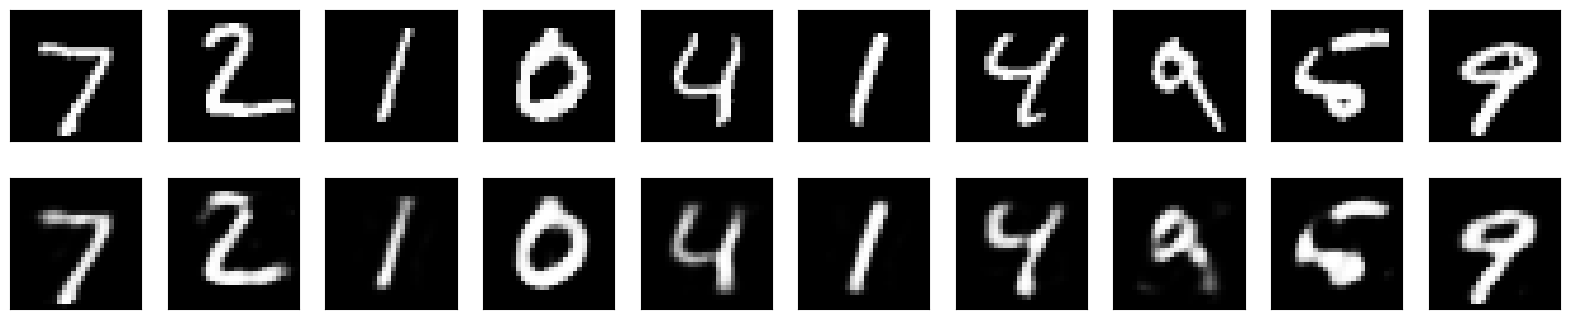

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

In [ ]:
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

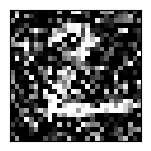

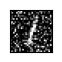

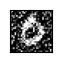

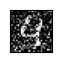

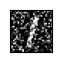

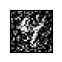

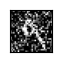

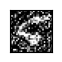

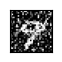

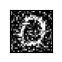

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
  ax = plt.subplot(1, n, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
from keras import layers
import tensorflow as tf
from keras.callbacks import TensorBoard
encoding_dim = 32 # This is our input image input_img = keras.Input(shape=(784,))

In [ ]:
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, shuffle=True,validation_data=(x_test_noisy,x_test))

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2477 - val_loss: 0.1846
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1691 - val_loss: 0.1563
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1504 - val_loss: 0.1426
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1400 - val_loss: 0.1353
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1348 - val_loss: 0.1321
Epoch 6/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1323 - val_loss: 0.1305
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1312 - val_loss: 0.1297
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1305 - val_loss: 0.1292
Epoch 9/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1302 - val_loss: 0.1289
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1299 - val_loss: 0.1

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 1ms/step


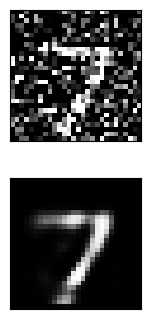

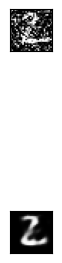

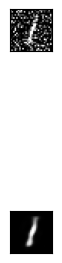

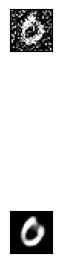

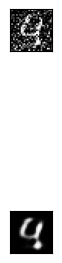

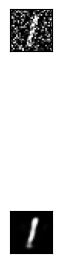

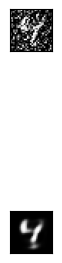

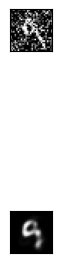

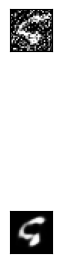

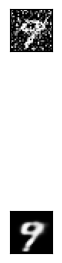

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()